In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [42]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\Social_Network_Ads_Expanded.csv")

In [43]:
df.head(20)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [5]:
df["Purchased"].value_counts()

Purchased
0    149
1     51
Name: count, dtype: int64

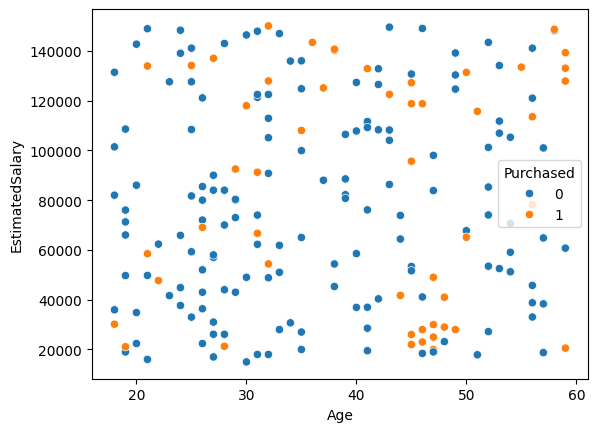

In [7]:
sns.scatterplot(x="Age",y="EstimatedSalary",hue="Purchased",data=df)
plt.show()

In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
x = df.iloc[:,:-1]
y = df["Purchased"]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
195,45,118746
196,45,51631
197,37,87991
198,47,19014


In [12]:
#Scaling the dataaa
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x.head(20)

,Age,EstimatedSalary
0,-1.543904,-1.430310
1,-0.195884,-1.406600
2,-0.954145,-0.861259
3,-0.869894,-0.529312
4,-1.543904,-0.078813
5,-0.869894,-0.505602
6,-0.869894,0.110871
7,-0.448638,1.675763
8,-1.038397,-1.098364
9,-0.195884,-0.339628


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)*100,knn.score(x_train,y_train)*100

(77.5, 77.5)

In [30]:
for i in range(1,30):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i,knn1.score(x_test,y_test)*100,knn1.score(x_train,y_train)*100)

1 70.0 100.0
2 75.0 83.75
3 77.5 85.0
4 80.0 85.0
5 80.0 81.25
6 77.5 81.25
7 77.5 79.375
8 77.5 78.75
9 77.5 80.0
10 77.5 78.75
11 80.0 80.0
12 77.5 78.75
13 77.5 79.375
14 77.5 78.125
15 77.5 77.5
16 77.5 78.125
17 77.5 76.875
18 77.5 78.125
19 77.5 77.5
20 77.5 78.75
21 77.5 78.75
22 72.5 75.0
23 72.5 74.375
24 72.5 75.0
25 72.5 75.0
26 72.5 75.0
27 72.5 75.0
28 72.5 75.0
29 72.5 75.0


In [40]:
knn.predict([[0.730879,-1.216916]])

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


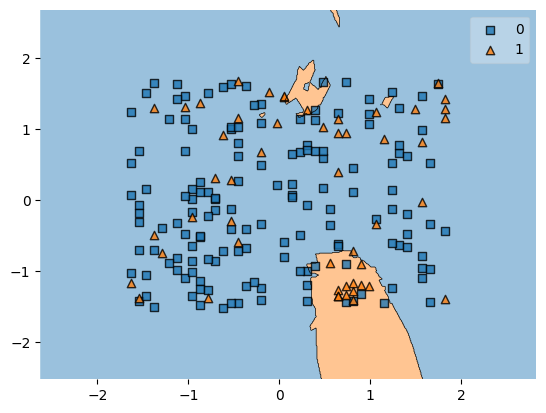

In [47]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()

#KNeighborsRegressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn2 = KNeighborsRegressor(n_neighbors=20)
knn2.fit(x_train,y_train)
knn2.score(x_test,y_test)*100,knn2.score(x_train,y_train)*100

(6.927899686520389, 13.108333333333345)

In [56]:
for i in range(1,30):
    knn3 = KNeighborsRegressor(n_neighbors=i)
    knn3.fit(x_train,y_train)
    print(i,knn3.score(x_test,y_test)*100,knn3.score(x_train,y_train)*100)

1 -50.47021943573667 100.0
2 -25.39184952978055 54.16666666666667
3 5.2594914663880115 44.44444444444443
4 16.144200626959247 36.25000000000001
5 20.25078369905955 31.066666666666652
6 10.135841170323934 28.981481481481474
7 9.410786258076897 24.693877551020403
8 9.482758620689658 22.135416666666664
9 5.87871047641163 20.16460905349794
10 5.705329153605021 16.89999999999999
11 7.873260965310013 18.154269972451807
12 10.571229536746795 18.287037037037045
13 8.66428001706515 17.45562130177514
14 9.794638858678296 14.574829931972788
15 6.597004528038997 13.111111111111097
16 7.3275862068965525 12.5
17 5.847642394593855 12.987312572087673
18 6.304423545802862 13.220164609053498
19 7.0849868442761865 12.797783933518003
20 6.927899686520389 13.108333333333345
21 6.823335394763963 12.335600907029477
22 4.557112878572001 11.928374655647389
23 3.6450154369455645 11.783238815374919
24 2.0811563915012266 11.880787037037043
25 1.6526645768025205 10.64533333333333
26 3.025356606258478 9.74852071005